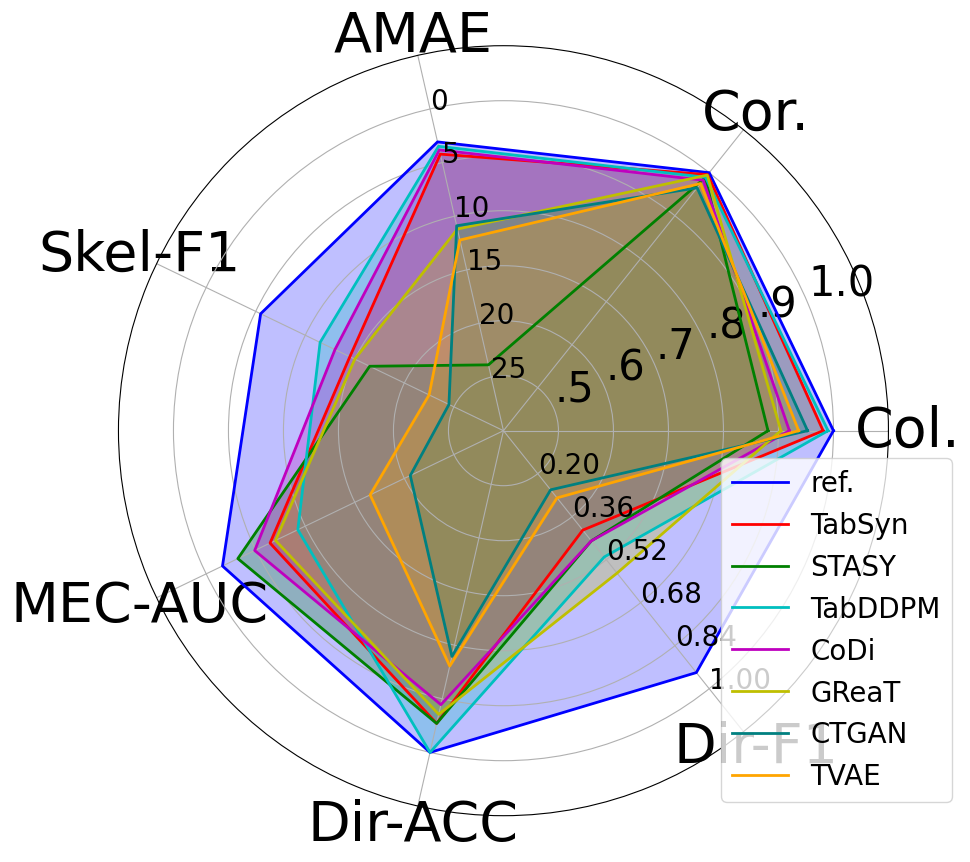

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

# Data for the radar plot
categories = [ 'Col.', 'Cor.','AMAE', 'Skel-F1', 'MEC-AUC', 'Dir-ACC', 'Dir-F1']

n_categories = len(categories)

# Convert the data into lists
ref = [0.00, 0.00,3.07, 0.89, 0.967, 1.000, 0.94]
TabSyn = [1.88, 0.45,4.21, 0.71, 0.871, 0.946, 0.41]
STASY = [11.90, 1.18,23.86, 0.67, 0.936, 0.946, 0.45]
TabDDPM = [ 0.98, 1.07,3.48, 0.77, 0.815, 1.000, 0.51]
CoDi = [8.01, 1.75,3.82, 0.74, 0.902, 0.911, 0.45]
GReaT = [9.56, 0.56,11.20, 0.70, 0.860, 0.929, 0.57]
CTGAN = [4.71, 3.52,10.89, 0.51, 0.588, 0.821, 0.26]
TVAE = [6.33, 2.52,12.22, 0.55, 0.669, 0.839, 0.29]


def score_trans(ls):

    ls[0] = (100-ls[0])/100.0
    ls[1] = (100-ls[1])/100.0
    ls[2] = 0.5 + (1 - (ls[2] ) / 25) * 0.5
    ls[-1] = (ls[-1] - 0.2)/1.6 + 0.5
    return ls


ref = score_trans(ref)
TabSyn = score_trans(TabSyn)
STASY = score_trans(STASY)
TabDDPM = score_trans(TabDDPM)
CoDi = score_trans(CoDi)
GReaT = score_trans(GReaT)
CTGAN = score_trans(CTGAN)
TVAE = score_trans(TVAE)


# Create radar plot
angles = [n / float(n_categories) * 2 * pi for n in range(n_categories)]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
# ax.set_rgrids([0.4, 0.5,0.6,0.7,0.8])

def add_to_radar_plot(data, label, color):
    data += data[:1]
    ax.plot(angles, data, linewidth=2, linestyle='solid', label=label, color=color)
    ax.fill(angles, data, alpha=0.25, color=color)

add_to_radar_plot(ref, 'ref.', 'b')
add_to_radar_plot(TabSyn, 'TabSyn', 'r')
add_to_radar_plot(STASY, 'STASY', 'g')
add_to_radar_plot(TabDDPM, 'TabDDPM', 'c')
add_to_radar_plot(CoDi, 'CoDi', 'm')
add_to_radar_plot(GReaT, 'GReaT', 'y')
add_to_radar_plot(CTGAN, 'CTGAN', 'teal')
add_to_radar_plot(TVAE, 'TVAE', 'orange')
    
angle = angles[-2]
for i,value in  enumerate([0.5, 0.6, 0.7,0.8,0.9, 1.0]):     
        ax.text(angle, value, "{:.2f}".format((value - 0.5) * 1.6 +0.2), size=20)

angle = angles[2]
for i,value in  enumerate([0.5, 0.6, 0.7,0.8,0.9, 1.0]):     
        ax.text(angle, value, "{:.0f}".format(25-(value - 0.5) * 50 ), size=20)


plt.xticks(angles[:-1], categories, color='black', size=40)

plt.yticks([ 0.5, 0.6, 0.7,0.8,0.9, 1.0], [".5",".6", ".7",".8",".9", "1.0"], color="black", size=30)
plt.ylim(0.4, 1.1)

plt.legend(loc='lower right', bbox_to_anchor=(1.1, 0.0), fontsize=20)
plt.savefig(f'./result/lu_radar.pdf')
plt.show()